In [4]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [24]:
N = 40
dt = 1 
dx = 1
D_u = 0.16
D_v = 0.08
f = 0.035
k = 0.060
w = 1.9

In [25]:
def init(N, v_size):
    '''
    Initialize a grid with all zeros
    Args:
        -N the size of the grid
    Out: the initial state 
    of the grid
    '''
    u_grid = np.full((N,N), 0.5)
    v_grid = np.zeros((N,N))
    for i in np.arange(int(N/2-v_size),int(N/2+v_size),1):
        for j in np.arange(int(N/2-v_size),int(N/2+v_size),1):
            v_grid[i,j]=0.25
    return u_grid, v_grid

In [12]:
def GS_update(U_grid, D_u, V_grid, D_v, f, k):
    U = np.copy(U_grid)
    V = np.copy(V_grid)
    for j in range(0,len(U)):
        for i in range(0,len(U)):
            u = U[j,i]
            v = V[j,i]
            
            grad_u = (D_u*dt / (dx**2)) * (U[(j+1)%len(U), i] + U[(j-1)%len(U),i]+ U[j,(i+1)%len(U)] +U[j,(i-1)%len(U)] - 4*u)
            U_grid[j,i] = u + (D_u * grad_u) - (u * v**2) + (f * (1-u))
            
            grad_v = (D_v*dt / (dx**2)) * (V[(j+1)%len(U), i] + V[(j-1)%len(U),i]+ V[j,(i+1)%len(U)] +V[j,(i-1)%len(U)] - 4*v)             
            V_grid[j,i] = v + (D_v * grad_v) + (u * v**2) - ((f+k) * v)

    return U_grid, V_grid

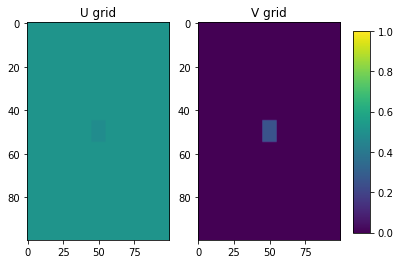

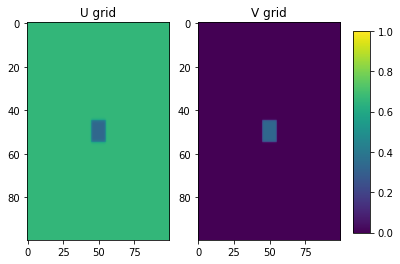

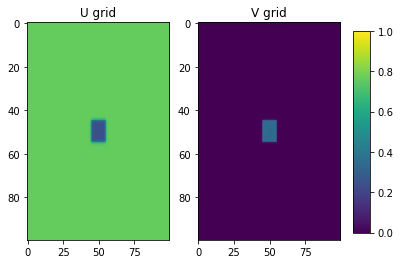

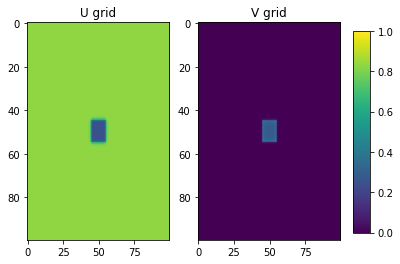

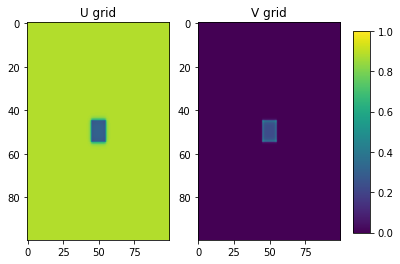

In [13]:
U_grid,V_grid = init(N,5)

def run(U_grid,V_grid,t_max):
    for t in range(t_max):
        U_grid, V_grid = GS_update(U_grid, D_u, V_grid, D_v, f, k)
        if t%10 == 0:
            fig, axes = plt.subplots(nrows=1, ncols=2)
            im1 = axes[0].imshow(U_grid,vmin=0, vmax=1,aspect='auto', cmap='viridis')
            axes[0].set_title("U grid")
            im2 = axes[1].imshow(V_grid,vmin=0, vmax=1,aspect='auto', cmap='viridis')
            axes[1].set_title("V grid")
            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
            fig.colorbar(im2, cax=cbar_ax)
run(U_grid,V_grid,50)